In [1]:
import pandas as pd 
import numpy as np

import scipy.stats as stats
import statsmodels.stats.api as sms

from math import ceil
import seaborn as sns

## Load Users Data 

In [373]:
user=pd.read_csv('./user_attributes.csv') 

In [374]:
user.head()

,user_id,attributes
0,00003e3b9e5336685200ae85d21b4f5e,"{""age"": 33, ""gender"": ""F"", ""location"": ""FL"", ""..."
1,000053b1e684c9e7ea73727b2238ce18,"{""age"": 26, ""gender"": ""M"", ""location"": ""AL"", ""..."
2,00029153d12ae1c9abe59c17ff2e0895,"{""age"": 29, ""gender"": ""F"", ""location"": ""AR"", ""..."
3,0002ac0d783338cfeab0b2bdbd872cda,"{""age"": 29, ""gender"": ""M"", ""location"": ""SC"", ""..."
4,0004d0b59e19461ff126e3a08a814c33,"{""age"": 27, ""gender"": ""F"", ""location"": ""AR"", ""..."


In [375]:
# First, we tokenized the user attributes file and splitted the attributes column into age, gender, location and 
#  test columns. Therefore, the user attributes file has 5 columns: user_id, age, gender, location, and test. 

In [376]:
user[['0','1','2','3']]=user['attributes'].str.split(',', expand=True) 
user

,user_id,attributes,0,1,2,3
0,00003e3b9e5336685200ae85d21b4f5e,"{""age"": 33, ""gender"": ""F"", ""location"": ""FL"", ""...","{""age"": 33","""gender"": ""F""","""location"": ""FL""","""test"": 1}"
1,000053b1e684c9e7ea73727b2238ce18,"{""age"": 26, ""gender"": ""M"", ""location"": ""AL"", ""...","{""age"": 26","""gender"": ""M""","""location"": ""AL""","""test"": 1}"
2,00029153d12ae1c9abe59c17ff2e0895,"{""age"": 29, ""gender"": ""F"", ""location"": ""AR"", ""...","{""age"": 29","""gender"": ""F""","""location"": ""AR""","""test"": 1}"
3,0002ac0d783338cfeab0b2bdbd872cda,"{""age"": 29, ""gender"": ""M"", ""location"": ""SC"", ""...","{""age"": 29","""gender"": ""M""","""location"": ""SC""","""test"": 0}"
4,0004d0b59e19461ff126e3a08a814c33,"{""age"": 27, ""gender"": ""F"", ""location"": ""AR"", ""...","{""age"": 27","""gender"": ""F""","""location"": ""AR""","""test"": 1}"
...,...,...,...,...,...,...
99995,fffe56994e6be696722539f962415cd2,"{""age"": 24, ""gender"": ""F"", ""location"": ""FL"", ""...","{""age"": 24","""gender"": ""F""","""location"": ""FL""","""test"": 0}"
99996,fffe9f664c2ddba4a37bcd35936c7422,"{""age"": 31, ""gender"": ""M"", ""location"": ""AL"", ""...","{""age"": 31","""gender"": ""M""","""location"": ""AL""","""test"": 1}"
99997,fffee5badc626a2ab8086120712e5639,"{""age"": 22, ""gender"": ""M"", ""location"": ""FL"", ""...","{""age"": 22","""gender"": ""M""","""location"": ""FL""","""test"": 0}"
99998,ffffda8ada4827900cbf65fd20281080,"{""age"": 22, ""gender"": ""F"", ""location"": ""TN"", ""...","{""age"": 22","""gender"": ""F""","""location"": ""TN""","""test"": 1}"


In [377]:
user=user.drop(['attributes'],axis=1) ## drop attributes column 
user

,user_id,0,1,2,3
0,00003e3b9e5336685200ae85d21b4f5e,"{""age"": 33","""gender"": ""F""","""location"": ""FL""","""test"": 1}"
1,000053b1e684c9e7ea73727b2238ce18,"{""age"": 26","""gender"": ""M""","""location"": ""AL""","""test"": 1}"
2,00029153d12ae1c9abe59c17ff2e0895,"{""age"": 29","""gender"": ""F""","""location"": ""AR""","""test"": 1}"
3,0002ac0d783338cfeab0b2bdbd872cda,"{""age"": 29","""gender"": ""M""","""location"": ""SC""","""test"": 0}"
4,0004d0b59e19461ff126e3a08a814c33,"{""age"": 27","""gender"": ""F""","""location"": ""AR""","""test"": 1}"
...,...,...,...,...,...
99995,fffe56994e6be696722539f962415cd2,"{""age"": 24","""gender"": ""F""","""location"": ""FL""","""test"": 0}"
99996,fffe9f664c2ddba4a37bcd35936c7422,"{""age"": 31","""gender"": ""M""","""location"": ""AL""","""test"": 1}"
99997,fffee5badc626a2ab8086120712e5639,"{""age"": 22","""gender"": ""M""","""location"": ""FL""","""test"": 0}"
99998,ffffda8ada4827900cbf65fd20281080,"{""age"": 22","""gender"": ""F""","""location"": ""TN""","""test"": 1}"


In [378]:
user[['0','age']]=user['0'].str.split(':', expand=True)
user[['1','gender']]=user['1'].str.split(':', expand=True)
user[['2','location']]=user['2'].str.split(':', expand=True)
user[['3','test']]=user['3'].str.split(':', expand=True)

user=user.drop(['0','1','2','3'],axis=1)
user  ## now we have a new user dateset that includes 5 columns 

,user_id,age,gender,location,test
0,00003e3b9e5336685200ae85d21b4f5e,33,"""F""","""FL""",1}
1,000053b1e684c9e7ea73727b2238ce18,26,"""M""","""AL""",1}
2,00029153d12ae1c9abe59c17ff2e0895,29,"""F""","""AR""",1}
3,0002ac0d783338cfeab0b2bdbd872cda,29,"""M""","""SC""",0}
4,0004d0b59e19461ff126e3a08a814c33,27,"""F""","""AR""",1}
...,...,...,...,...,...
99995,fffe56994e6be696722539f962415cd2,24,"""F""","""FL""",0}
99996,fffe9f664c2ddba4a37bcd35936c7422,31,"""M""","""AL""",1}
99997,fffee5badc626a2ab8086120712e5639,22,"""M""","""FL""",0}
99998,ffffda8ada4827900cbf65fd20281080,22,"""F""","""TN""",1}


In [379]:
user['test'] =  user['test'].apply(lambda x: x.replace('}','')) ## remove } in test column

In [380]:
user['test']=user['test'].astype(int) ## make test column values to integers

In [381]:
user['gender']=user['gender'].astype('category')
user['location']=user['location'].astype('category')

user['age']=user['age'].astype(int)

In [382]:
user.head()

,user_id,age,gender,location,test
0,00003e3b9e5336685200ae85d21b4f5e,33,"""F""","""FL""",1
1,000053b1e684c9e7ea73727b2238ce18,26,"""M""","""AL""",1
2,00029153d12ae1c9abe59c17ff2e0895,29,"""F""","""AR""",1
3,0002ac0d783338cfeab0b2bdbd872cda,29,"""M""","""SC""",0
4,0004d0b59e19461ff126e3a08a814c33,27,"""F""","""AR""",1


In [3]:
import os 

os.getcwd()

'/Users/hello/Desktop/Upwork/April2022'

# Load bid request data

In [4]:
bid=pd.read_csv('/Users/hello/Desktop/Upwork/April2022/bid_requests.csv') 

In [384]:
bid['bid']=bid['bid'].astype(int)
bid['win']=bid['win'].astype(int)
bid['conversion']=bid['conversion'].astype(int)

In [5]:
bid

,timestamp,user_id,bid,win,conversion
0,2017-01-01 00:00:01,be7485be5b6eb3690efcbc9e95e8f15a,0,0,0
1,2017-01-01 00:00:02,26c5dca2512a4c7fe8810bd04191b1b3,0,0,0
2,2017-01-01 00:00:05,2121376a323507c01c5e92c39ae8ccd4,0,0,0
3,2017-01-01 00:00:12,fa6a0925d911185338b0acc93c66dc92,0,0,0
4,2017-01-01 00:00:13,4299f209da83da82b711f1d631cc607b,1,0,0
...,...,...,...,...,...
599995,2017-01-23 13:19:09,51c3fa97c525c0d22fbc4c5ad9870962,1,1,0
599996,2017-01-23 13:19:13,b24ba39b66b1201a1bd4ccca14555322,1,0,0
599997,2017-01-23 13:19:23,ea2621147c2f3912a780587ee03c3889,0,0,0
599998,2017-01-23 13:19:24,79fc3070bcfc1f4125855692285a3a69,1,1,0


## Merge Data

In [405]:
## select users that have been assigned to test group 
## and also request for bids as well 
## so we join two datasets for the intersection

request=user.join(bid.set_index('user_id'),on='user_id',how='inner') 
request 

,user_id,age,gender,location,test,timestamp,bid,win,conversion
0,00003e3b9e5336685200ae85d21b4f5e,33,"""F""","""FL""",1,2017-01-01 13:43:34,1,0,0
0,00003e3b9e5336685200ae85d21b4f5e,33,"""F""","""FL""",1,2017-01-04 03:59:18,0,0,0
0,00003e3b9e5336685200ae85d21b4f5e,33,"""F""","""FL""",1,2017-01-04 17:41:50,1,1,0
0,00003e3b9e5336685200ae85d21b4f5e,33,"""F""","""FL""",1,2017-01-07 04:02:42,1,1,0
0,00003e3b9e5336685200ae85d21b4f5e,33,"""F""","""FL""",1,2017-01-08 09:05:01,1,0,0
...,...,...,...,...,...,...,...,...,...
99999,fffffe98d0963d27015c198262d97221,18,"""F""","""NC""",1,2017-01-11 08:40:43,0,0,0
99999,fffffe98d0963d27015c198262d97221,18,"""F""","""NC""",1,2017-01-11 09:19:52,0,0,0
99999,fffffe98d0963d27015c198262d97221,18,"""F""","""NC""",1,2017-01-14 17:15:44,0,0,0
99999,fffffe98d0963d27015c198262d97221,18,"""F""","""NC""",1,2017-01-19 07:02:42,0,0,0


In [387]:
### create a new dataset that includes distinct user id 

a=request.drop_duplicates(subset=['user_id'])
a=a.drop(['timestamp','bid','win','conversion'],axis=1)
a

,user_id,age,gender,location,test
0,00003e3b9e5336685200ae85d21b4f5e,33,"""F""","""FL""",1
1,000053b1e684c9e7ea73727b2238ce18,26,"""M""","""AL""",1
2,00029153d12ae1c9abe59c17ff2e0895,29,"""F""","""AR""",1
3,0002ac0d783338cfeab0b2bdbd872cda,29,"""M""","""SC""",0
5,00053f5e11d1fe4e49a221165b39abc9,31,"""F""","""GA""",1
...,...,...,...,...,...
99987,fff75f52998a477f6e7b00e58af8d64a,32,"""M""","""FL""",0
99989,fff855cddcd8ab3cc1c1b4958b6c95cd,18,"""M""","""GA""",0
99995,fffe56994e6be696722539f962415cd2,24,"""F""","""FL""",0
99998,ffffda8ada4827900cbf65fd20281080,22,"""F""","""TN""",1


In [388]:
## create a new dataset that aggregates the bid, win and conversion
## for each user, then we know how many bids, winnings, and conversions for each user at different time

b=pd.DataFrame(request.groupby(['user_id']).agg({
    'bid':'sum',
    'win':'sum',
    'conversion':'sum'
}))

b.reset_index(drop=True, inplace=True)
b

,bid,win,conversion
0,7,4,0
1,4,0,0
2,1,0,0
3,2,0,0
4,4,2,0
...,...,...,...
63132,3,1,0
63133,6,1,0
63134,2,0,0
63135,1,1,0


In [389]:
## merge two new datasets and now we have a dataset having users who are tested and requested. 

request_bid=pd.concat([a,b],axis=1)
request_bid

,user_id,age,gender,location,test,bid,win,conversion
0,00003e3b9e5336685200ae85d21b4f5e,33.0,"""F""","""FL""",1.0,7.0,4.0,0.0
1,000053b1e684c9e7ea73727b2238ce18,26.0,"""M""","""AL""",1.0,4.0,0.0,0.0
2,00029153d12ae1c9abe59c17ff2e0895,29.0,"""F""","""AR""",1.0,1.0,0.0,0.0
3,0002ac0d783338cfeab0b2bdbd872cda,29.0,"""M""","""SC""",0.0,2.0,0.0,0.0
5,00053f5e11d1fe4e49a221165b39abc9,31.0,"""F""","""GA""",1.0,6.0,4.0,0.0
...,...,...,...,...,...,...,...,...
63108,NaN,NaN,NaN,NaN,NaN,3.0,3.0,0.0
63121,NaN,NaN,NaN,NaN,NaN,7.0,5.0,0.0
63127,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
63130,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0


In [390]:
request2=request_bid.dropna(axis=0,how='any')
request2

,user_id,age,gender,location,test,bid,win,conversion
0,00003e3b9e5336685200ae85d21b4f5e,33.0,"""F""","""FL""",1.0,7.0,4.0,0.0
1,000053b1e684c9e7ea73727b2238ce18,26.0,"""M""","""AL""",1.0,4.0,0.0,0.0
2,00029153d12ae1c9abe59c17ff2e0895,29.0,"""F""","""AR""",1.0,1.0,0.0,0.0
3,0002ac0d783338cfeab0b2bdbd872cda,29.0,"""M""","""SC""",0.0,2.0,0.0,0.0
5,00053f5e11d1fe4e49a221165b39abc9,31.0,"""F""","""GA""",1.0,6.0,4.0,0.0
...,...,...,...,...,...,...,...,...
63131,a18177565d506ce27ba1197cb765ee0b,27.0,"""M""","""NC""",1.0,1.0,0.0,0.0
63132,a181b018257a429a613c2d8df37fbd9a,23.0,"""M""","""TN""",1.0,3.0,1.0,0.0
63134,a184af8d7fd7cbd41994bcf1731757ff,23.0,"""M""","""TN""",1.0,2.0,0.0,0.0
63135,a184b4b9f0888e2aafcf0c7de476946b,23.0,"""F""","""AL""",1.0,1.0,1.0,0.0


In [306]:
request2.describe()

,age,test,bid,win,conversion
count,39818.000000,39818.000000,39818.000000,39818.000000,39818.000000
mean,25.495580,0.561605,4.735723,2.371817,0.098574
std,4.598837,0.496197,3.259510,2.029582,0.328169
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,2.000000,1.000000,0.000000
50%,25.000000,1.000000,4.000000,2.000000,0.000000
75%,29.000000,1.000000,6.000000,3.000000,0.000000
max,33.000000,1.000000,27.000000,17.000000,5.000000


In [307]:
request2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39818 entries, 15336 to 40099
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   user_id     39818 non-null  object  
 1   age         39818 non-null  float64 
 2   gender      39818 non-null  category
 3   location    39818 non-null  category
 4   test        39818 non-null  float64 
 5   bid         39818 non-null  float64 
 6   win         39818 non-null  float64 
 7   conversion  39818 non-null  float64 
dtypes: category(2), float64(5), object(1)
memory usage: 2.2+ MB


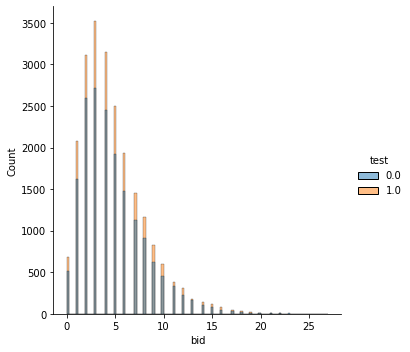

In [310]:
sns.displot(data=request2, x="bid", hue="test") ## histogram for requests in control and test group 

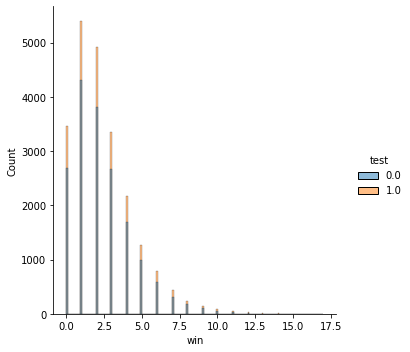

In [311]:
sns.displot(data=request2, x="win", hue="test") ## histogram for winnings in control and test group 

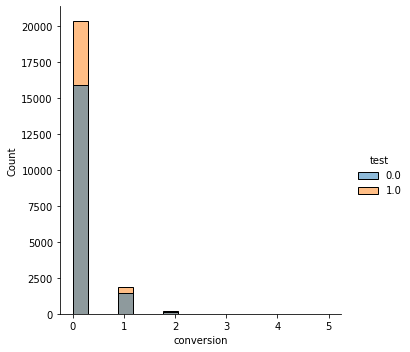

In [312]:
sns.displot(data=request2, x="conversion", hue="test") ## histogram for conversions in control and test group 

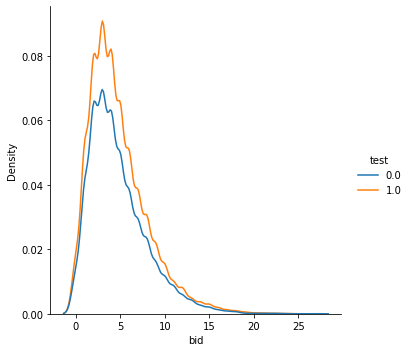

In [315]:
# distribution for requests in control and test group 
sns.displot(data=request2, x='bid',hue='test', kind="kde") 

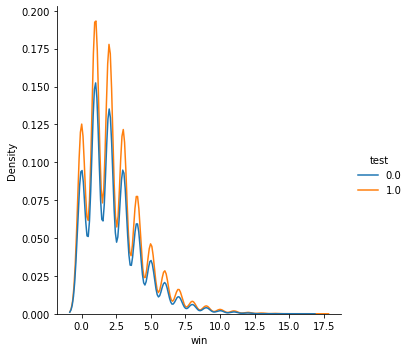

In [316]:
# distribution for winnings  in control and test group

sns.displot(data=request2, x='win',hue='test', kind="kde")

<AxesSubplot:xlabel='conversion', ylabel='count'>

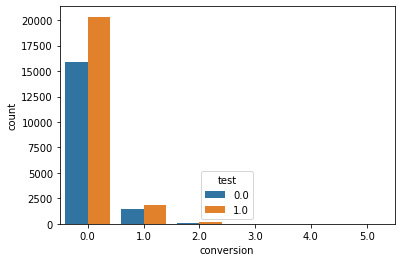

In [321]:
# histogram for conversions in control and test group

sns.countplot(x="conversion",hue='test',data=request2)

<AxesSubplot:xlabel='conversion', ylabel='count'>

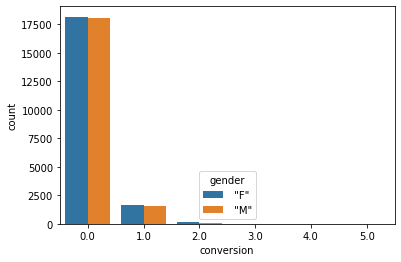

In [324]:
# histogram for conversions in male and female group

sns.countplot(x="conversion",hue='gender',data=request2)

In [329]:

## calculate conversion rate for control group and test group 

conversion_rates = request2.groupby('test')['conversion']
std_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
se_p = lambda x: stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']

In [330]:
conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
test,,,
0.000000,0.098,0.325,0.002
1.000000,0.099,0.330,0.002


<AxesSubplot:xlabel='test', ylabel='conversion'>

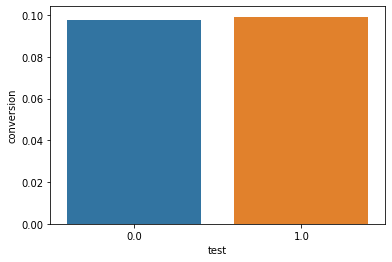

In [331]:
## bar plot for conversion rate in control group and test group 

sns.barplot(x=request2['test'], y=request2['conversion'], ci=False)

In [334]:

## implement z test to testify if there is difference in conversion rate between 
## control group and test group 


from statsmodels.stats.proportion import proportions_ztest, proportion_confint
control_results = request2[request2['test'] == 0]['conversion']
treatment_results = request2[request2['test'] == 1]['conversion']
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for test group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: -0.50
p-value: 0.618
ci 95% for control group: [0.093, 0.102]
ci 95% for test group: [0.095, 0.103]


## Question 1


### The distributions related to requests and the users we targeted display lognormal distributions. 
### The lognormal distribution is skewed to right. 


## Question 2

### Based on the results above, the conversion rate for the control group is 0.098 and
### the conversion rate for the test group is 0.099. 

### Next, we performed the z test. 

### Since our p-value=0.618 is way above our α=0.05 threshold, we fail to reject the Null hypothesis,
### which means that our new creative design did not perform significantly different 
### (let alone better) than our old one.

### Additionally, we notice that: the confidence interval for the control group ([0.093, 0.102], or 9.3-10.2%) 
###     and the confidence interval for the test group ([0.095, 0.103], or 9.5-10.3%)
    
### This is further proof that our new design is not likely to be an improvement on our old design, 
### and that unfortunately we are back to the drawing board!



In [416]:
## when we retarget the converted users 

request3=request[request['conversion']==1].groupby('user_id').agg({
    'bid':'sum',
    'win':'sum',
    'conversion':'sum'
})
request4=pd.merge(request3, request2, on='user_id')


In [417]:
request4=request4.drop(['bid_y','win_y','conversion_y'],axis=1)

In [422]:
request4[request4['conversion_x']>=2].count()

user_id         301
bid_x           301
win_x           301
conversion_x    301
age             301
gender          301
location        301
test            301
dtype: int64

In [426]:
conversion_rate = 301/len(request4)
conversion_rate

0.08488437676254935

<!-- Based on the results above, we can observe that the conversion rate for control group is 0.098 and
the conversion rate for test group is 0.099, which means test users are not more likely to convert than control users.

Based on the z test statistics, our p-value=0.618 is way above our α=0.05 threshold, 
we fail to reject the Null hypothesis, which means that our new creative design did not 
perform significantly different (let alone better) than our old one. 

Additionally, we notice that: the confidence interval for the test group ([0.095, 0.103], or 9.5-10.3%);
    the confidence interval for the control group ([0.093, 0.102], or 9.3-10.2%);


This is further proof that
our new design is not likely to be an improvement on our old design, and that unfortunately we are
back to the drawing board! -->

## Question 3

### The conversion rate to retarget the converted users is 8.49%

### Therefore, we should not consider retargeting users that have previously converted.
### The retargeting users in this campaign would not have improved performance.


# Conclusion

### We may conclude that the new creative did not increase conversions after comparing 
### the conversion rates of the control and test groups.

### Retargeting would not have improved campaign results.